In [1]:
import pandas as pd

In [2]:
#pip install git+https://github.com/quantopian/pyfolio
# import again if first time not work
import pyfolio

In [3]:
import matplotlib
matplotlib.use('Agg')
%matplotlib inline

In [4]:
from utils import get_daily_return, backtest_strat, get_firstrun_account_value

## DJIA

In [5]:
dji = pd.read_csv("data/^DJI.csv")
test_dji=dji[(dji['Date']>='2016-01-01') & (dji['Date']<='2020-06-30')]
test_dji = test_dji.reset_index(drop=True)

In [6]:
test_dji.shape

(1131, 7)

In [7]:
test_dji.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,17405.480469,17405.480469,16957.630859,17148.939453,17148.939453,148060000
1,2016-01-05,17147.500000,17195.839844,17038.609375,17158.660156,17158.660156,105750000
2,2016-01-06,17154.830078,17154.830078,16817.619141,16906.509766,16906.509766,120250000
3,2016-01-07,16888.359375,16888.359375,16463.630859,16514.099609,16514.099609,176240000
4,2016-01-08,16519.169922,16651.890625,16314.570313,16346.450195,16346.450195,141850000


In [8]:
test_dji['daily_return']=test_dji['Adj Close'].pct_change(1)

In [9]:
dow_strat = backtest_strat(test_dji)

## Baseline

In [10]:
baseline_account_value = get_firstrun_account_value()
baseline_account_value = get_daily_return(baseline_account_value)
baseline_account_value['Date'] = test_dji['Date']
baseline_strat = backtest_strat(baseline_account_value[0:1097])
baseline_strat.head()

1.5161118660149853
Sharpe:  1.5161118660149853


Date
2016-01-04 00:00:00+00:00         NaN
2016-01-05 00:00:00+00:00    0.000096
2016-01-06 00:00:00+00:00   -0.003727
2016-01-07 00:00:00+00:00   -0.008059
2016-01-08 00:00:00+00:00   -0.003930
dtype: float64

## Ensemble Strategy

In [11]:
from utils import get_account_value
ensemble_account_value = get_account_value('ensemble')
# ensemble_account_value = get_account_value('A2C_30k_dow_init')

1.4069949041864225


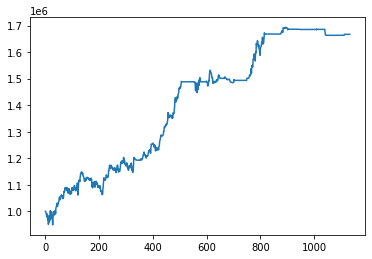

In [12]:
ensemble_account_value.account_value.plot()

In [13]:
ensemble_account_value = get_daily_return(ensemble_account_value)

Sharpe:  1.4069949041864225


In [14]:
ensemble_account_value['Date'] = test_dji['Date']

In [15]:
ensemble_account_value.head()

,account_value,datadate,daily_return,Date
0,1000000.000000,20160104,NaN,2016-01-04
1,999642.845087,20160105,-0.000357,2016-01-05
2,996187.940573,20160106,-0.003456,2016-01-06
3,990449.355862,20160107,-0.005761,2016-01-07
4,985803.688336,20160108,-0.004690,2016-01-08


In [16]:
ensemble_strat = backtest_strat(ensemble_account_value[0:1097])

In [17]:
#ensemble_account_value.to_csv('results/df_account_value_ensemble_daily_return.csv',index=False)

Start date,2016-01-04
End date,2020-05-12
Total months,52
,Backtest
Annual return,12.4%
Cumulative returns,66.3%
Annual volatility,8.5%
Sharpe ratio,1.42
Calmar ratio,1.66
Stability,0.94
Max drawdown,-7.4%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,7.40,2016-07-15,2016-11-03,2016-12-07,104
3,4.06,2017-03-01,2017-04-18,2017-06-13,75
1,3.62,2016-01-29,2016-02-10,2016-02-25,20
2,3.28,2016-01-04,2016-01-19,2016-01-29,20
4,3.00,2016-06-23,2016-06-24,2016-06-30,6


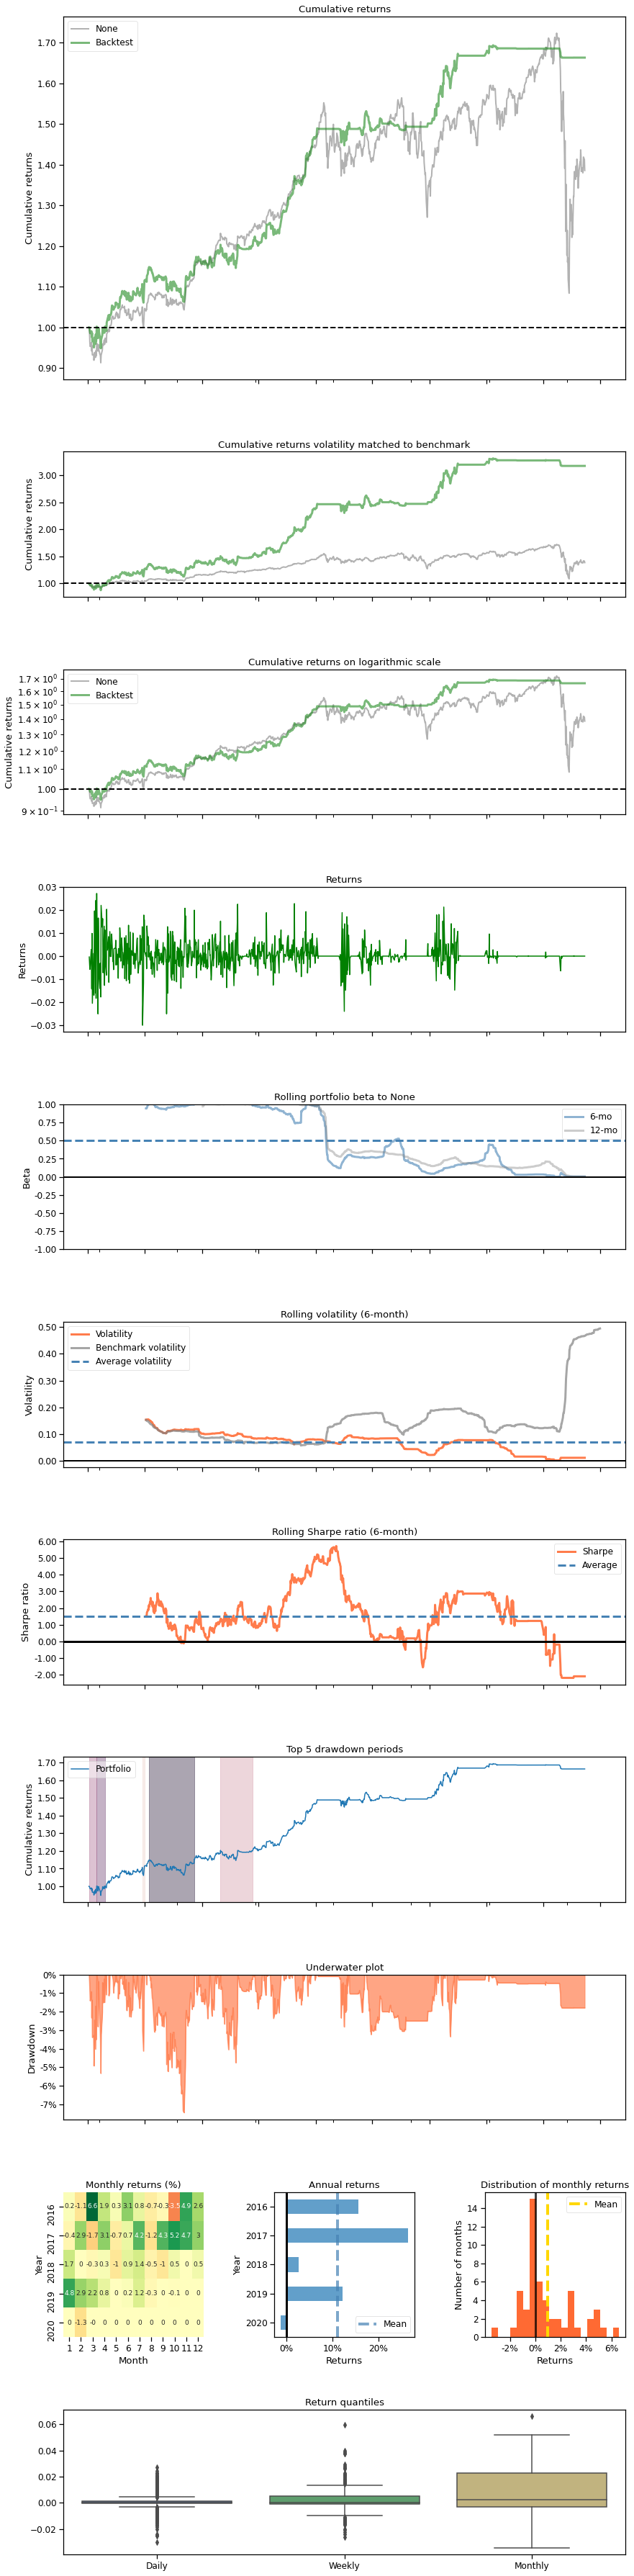

In [18]:
with pyfolio.plotting.plotting_context(font_scale=1.1):
    pyfolio.create_full_tear_sheet(returns=ensemble_strat,
                                   benchmark_rets=dow_strat, set_context=False)

Start date,2016-01-04
End date,2020-05-12
Total months,52
,Backtest
Annual return,12.4%
Cumulative returns,66.3%
Annual volatility,8.5%
Sharpe ratio,1.42
Calmar ratio,1.66
Stability,0.94
Max drawdown,-7.4%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,7.40,2016-07-15,2016-11-03,2016-12-07,104
3,4.06,2017-03-01,2017-04-18,2017-06-13,75
1,3.62,2016-01-29,2016-02-10,2016-02-25,20
2,3.28,2016-01-04,2016-01-19,2016-01-29,20
4,3.00,2016-06-23,2016-06-24,2016-06-30,6


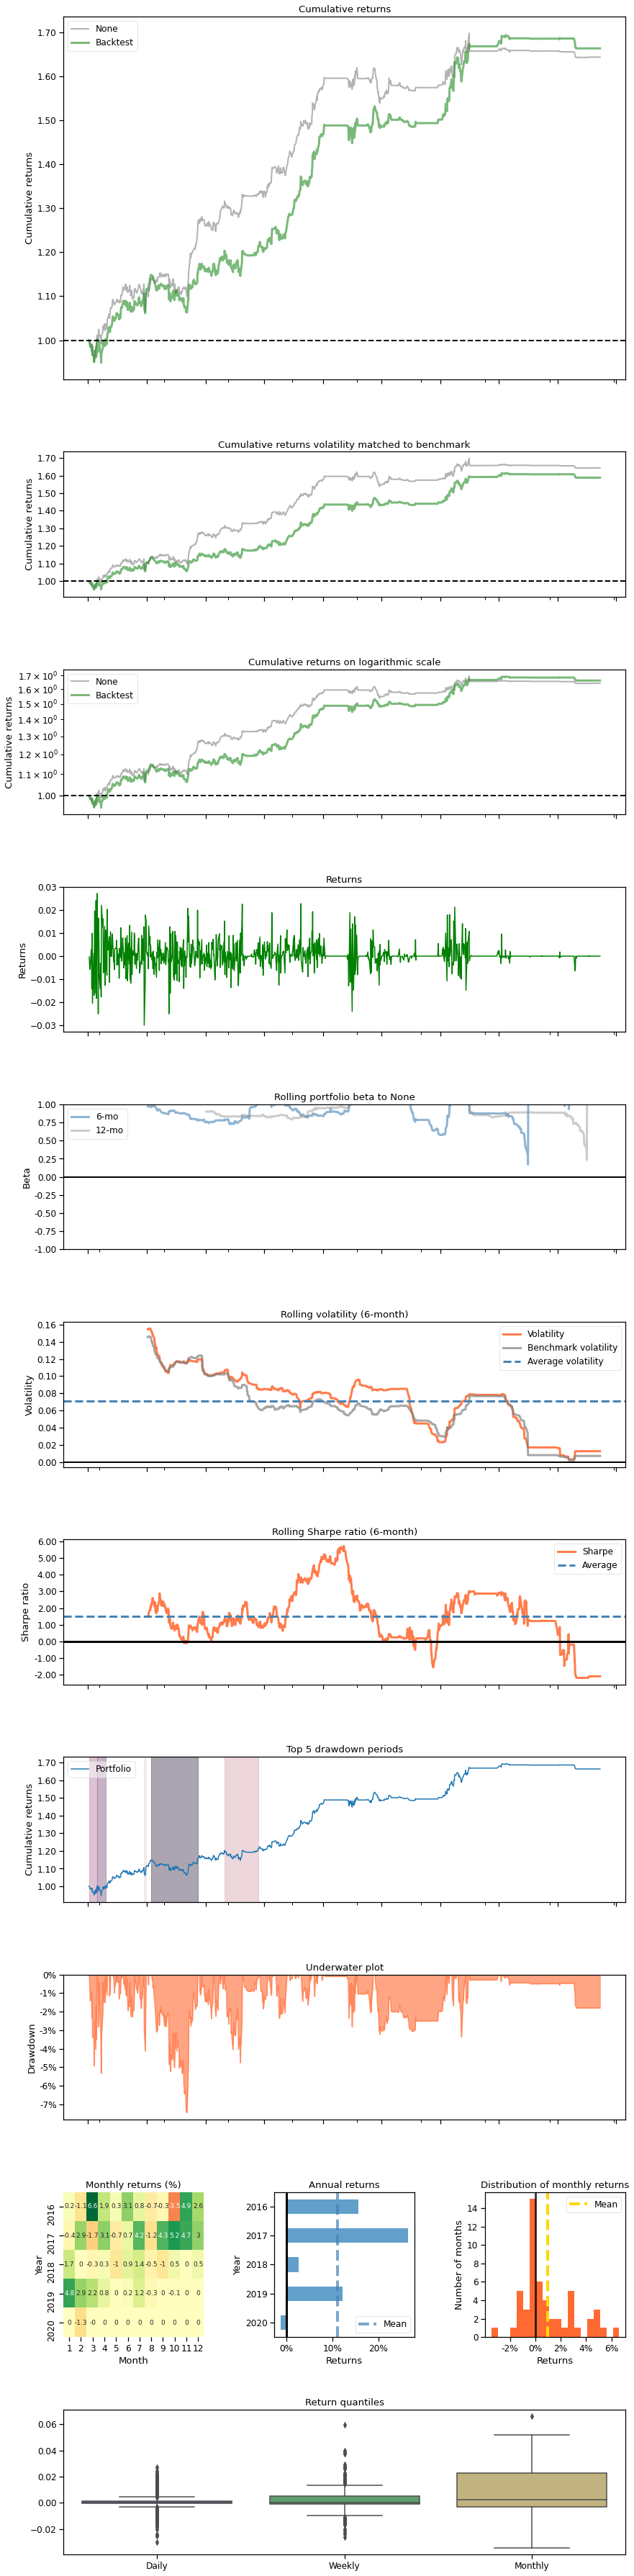

In [19]:
with pyfolio.plotting.plotting_context(font_scale=1.1):
    pyfolio.create_full_tear_sheet(returns=ensemble_strat,
                                   benchmark_rets=baseline_strat, set_context=False)